In [2]:
# Importing Necessary Librraies:

In [22]:
from sklearn.impute import SimpleImputer  # Handling Missing Values 
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import OrdinalEncoder # Encode categorical features as an integer array.

## pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# performance matrix:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading dataset:
train_df = pd.read_csv(r"../artifacts/train.csv")
test_df = pd.read_csv(r"../artifacts/test.csv")

In [8]:
# Chcek Shape:
train_df.shape, test_df.shape

((385266, 30), (165114, 30))

In [9]:
# train ratio:
train_df.shape[0]/(train_df.shape[0] + test_df.shape[0])

0.7

In [10]:
# Here al the featires are numerical in nature:

In [11]:
numerical_cols = train_df.columns[:-1] # exclude class label

In [12]:
 ## Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)
# ## Categorical Pipeline
# cat_pipeline = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy= 'most_frequent')),
#         ('ordinalencoder', OrdinalEncoder(categories=ordinal_categorical_cols_list)), # only ordinal categorical columns
#         ('scaler', StandardScaler())  # you can remove standardscalar -- if you want -- 
#     ]
# )

preprocessor = ColumnTransformer([
    # This estimator allows different columns or column subsets of the input to be transformed separately 
    # and the features generated by each transformer will be concatenated to form a single feature space.
    ('num_pipeline', num_pipeline, numerical_cols),
    # ('cat_pipeline', cat_pipeline, categorical_cols)
])

Applying the pre-processing pipeline:

In [13]:
X_train = pd.DataFrame(preprocessor.fit_transform(train_df), columns= preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(test_df), columns= preprocessor.get_feature_names_out())

In [14]:
X_train.head(5)

,num_pipeline__V1,num_pipeline__V2,num_pipeline__V3,num_pipeline__V4,num_pipeline__V5,num_pipeline__V6,num_pipeline__V7,num_pipeline__V8,num_pipeline__V9,num_pipeline__V10,...,num_pipeline__V20,num_pipeline__V21,num_pipeline__V22,num_pipeline__V23,num_pipeline__V24,num_pipeline__V25,num_pipeline__V26,num_pipeline__V27,num_pipeline__V28,num_pipeline__Amount
0,-0.805628,0.466161,0.846741,-1.221892,0.416225,0.595813,1.016870,-1.069778,4.216770,3.369447,...,2.821582,-1.064666,0.392045,-0.336187,1.007079,0.200546,-1.265062,-5.674426,-9.195926,-0.379818
1,-0.266757,-0.971043,0.512995,-0.056611,0.310314,0.154797,0.412866,-0.088488,0.597837,0.416545,...,-1.288186,-0.143567,0.643141,0.341381,0.133550,0.175878,-0.281839,0.143840,0.229733,0.397496
2,-2.798454,2.268507,-3.433906,3.121492,-2.073335,-1.120592,-2.737836,0.310647,-2.299842,-2.427568,...,0.811880,-1.482834,1.061537,1.318643,-1.829498,-0.021817,1.459555,2.302877,-3.599901,-0.425344
3,0.573171,0.699333,-0.665359,1.617811,0.678367,-1.313678,0.231603,-0.058705,-0.434832,-0.383133,...,0.286374,0.034247,-0.125059,0.119580,-0.757171,-0.838318,1.035467,0.566028,0.386185,-0.425344
4,0.052025,-0.082490,0.158568,0.252792,-0.386965,0.272372,0.090582,0.163890,-0.259897,-0.399987,...,0.795995,0.321811,0.490164,0.557337,0.418080,0.056362,1.397594,0.398812,0.284693,0.843060


In [15]:
X_test.head()

,num_pipeline__V1,num_pipeline__V2,num_pipeline__V3,num_pipeline__V4,num_pipeline__V5,num_pipeline__V6,num_pipeline__V7,num_pipeline__V8,num_pipeline__V9,num_pipeline__V10,...,num_pipeline__V20,num_pipeline__V21,num_pipeline__V22,num_pipeline__V23,num_pipeline__V24,num_pipeline__V25,num_pipeline__V26,num_pipeline__V27,num_pipeline__V28,num_pipeline__Amount
0,0.480986,-0.120615,0.216889,0.062879,-0.001893,-0.387906,0.002790,0.021852,0.056626,-0.123187,...,0.032085,0.192514,0.173938,-0.155381,0.483116,1.116043,-0.558107,0.534518,0.625650,-0.403344
1,0.505389,-0.282369,0.623949,-0.415048,0.486564,0.298798,0.523616,-0.154344,0.392194,0.572973,...,-0.253857,-0.146981,-0.073464,-0.109363,-0.698241,0.702565,-0.781748,-0.158688,-0.071663,-0.424961
2,0.784126,-0.200334,0.200701,0.550984,0.781201,0.794582,0.519438,-0.126707,0.029582,0.759265,...,-0.352223,-0.136239,0.133726,-0.051614,-0.553644,0.503070,0.313293,-0.149207,-0.134513,-0.393533
3,0.158488,-0.203620,0.455508,-0.440479,0.022484,0.572279,0.585581,-0.214606,0.500690,0.315525,...,0.060627,0.043523,0.204886,0.381845,-0.494913,-1.011641,-1.213303,-0.499887,0.156040,0.773889
4,0.344699,-0.205666,0.722297,-0.792062,0.513950,0.573620,0.555111,-0.069709,0.327360,0.551550,...,-0.128134,-0.267642,-0.748766,-0.037662,-1.240407,-0.347346,0.234923,0.155000,0.077939,-0.415017


In [16]:
y_train = train_df['Class']

In [18]:
y_test = test_df["Class"]

In [20]:
X_train.shape, X_test.shape

((385266, 29), (165114, 29))

In [29]:
y_train.shape, y_test.shape

((385266,), (165114,))

In [30]:
y_train.value_counts()

Class
1    192719
0    192547
Name: count, dtype: int64

In [31]:
y_test.value_counts()

Class
0    82643
1    82471
Name: count, dtype: int64

## Model Building:

In [56]:
classifiers = {
    'LogisticRegression': LogisticRegression(solver="liblinear"),
    'DecisionTree' : DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier(n_estimators=100, max_depth=6),
    'SVM' : SVC(probability=True),
    'XGBoost' : XGBClassifier(max_depth = 6)
}

In [33]:
result_table = pd.DataFrame(columns=['classifiers','accuracy','presicion','recall','f1_score','fpr','tpr','auc','conf_matrix'])


In [34]:
print(type(result_table))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
result_data = []

In [45]:
# Training all the specified models:

for key, classifier in classifiers.items():

    print(f"processing : {key}")
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    
    yproba = classifier.predict_proba(X_test)[::, 1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    conf_matrix = confusion_matrix(y_test, y_predict)
    
    # Create a dictionary for the current classifier's metrics
    classifier_metrics = {
        'classifiers': key,
        'accuracy': accuracy_score(y_test, y_predict),
        'precision': precision_score(y_test, y_predict, average='weighted'),
        'recall': recall_score(y_test, y_predict, average='weighted'),
        'f1_score': f1_score(y_test, y_predict, average='weighted'),
        'fpr': fpr, 
        'tpr': tpr, 
        'auc': auc,
        'conf_matrix': [conf_matrix]  # Wrap conf_matrix in a list to ensure consistency
    }

    # Append the dictionary to the result_data list
    result_data.append(classifier_metrics)



processing : LogisticRegression
processing : DecisionTree
processing : RandomForest
processing : XGBoost


In [47]:
# Convert the list of dictionaries to a DataFrame
result_table = pd.DataFrame(result_data)
result_table.set_index('classifiers', inplace=True)

In [46]:
result_data

[{'classifiers': 'SVM',
  'accuracy': 0.9934590646462444,
  'precision': 0.9934606812972747,
  'recall': 0.9934590646462444,
  'f1_score': 0.9934590530579148,
  'fpr': array([0.00000000e+00, 1.21002384e-05, 1.21002384e-05, ...,
         7.53251939e-01, 7.54691867e-01, 1.00000000e+00]),
  'tpr': array([0.        , 0.34288417, 0.34293267, ..., 1.        , 1.        ,
         1.        ]),
  'auc': 0.9997014114948237,
  'conf_matrix': [array([[82178,   465],
          [  615, 81856]], dtype=int64)]},
 {'classifiers': 'LogisticRegression',
  'accuracy': 0.9585983017793767,
  'precision': 0.9596582041635483,
  'recall': 0.9585983017793767,
  'f1_score': 0.958573338853741,
  'fpr': array([0.00000000e+00, 7.26014302e-05, 7.26014302e-05, ...,
         7.21863921e-01, 7.21863921e-01, 1.00000000e+00]),
  'tpr': array([0.        , 0.34167162, 0.35819864, ..., 0.99998787, 1.        ,
         1.        ]),
  'auc': 0.9919156760391055,
  'conf_matrix': [array([[81209,  1434],
          [ 5402, 770

In [49]:
# See results as a dataframe:
result_table

,accuracy,precision,recall,f1_score,fpr,tpr,auc,conf_matrix
classifiers,,,,,,,,
SVM,0.993459,0.993461,0.993459,0.993459,"[0.0, 1.2100238374695982e-05, 1.21002383746959...","[0.0, 0.34288416534296906, 0.3429326672406058,...",0.999701,"[[[82178, 465], [615, 81856]]]"
LogisticRegression,0.958598,0.959658,0.958598,0.958573,"[0.0, 7.260143024817589e-05, 7.260143024817589...","[0.0, 0.3416716179020504, 0.3581986395217713, ...",0.991916,"[[[81209, 1434], [5402, 77069]]]"
DecisionTree,0.997965,0.997967,0.997965,0.997965,"[0.0, 0.0029040572099270356, 1.0]","[0.0, 0.9988359544567181, 1.0]",0.997966,"[[[82403, 240], [96, 82375]]]"
RandomForest,0.961069,0.963362,0.961069,0.961020,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 4.850189763674504e-05, 6.062737204593129...",0.995544,"[[[82334, 309], [6119, 76352]]]"
XGBoost,0.999843,0.999843,0.999843,0.999843,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.000327387809048029, 0.0047653114428102...",0.999995,"[[[82617, 26], [0, 82471]]]"


In [50]:
def plot_confusion_matrix(ax, cm, class_names, title):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=class_names, 
                yticklabels=class_names, ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(title)

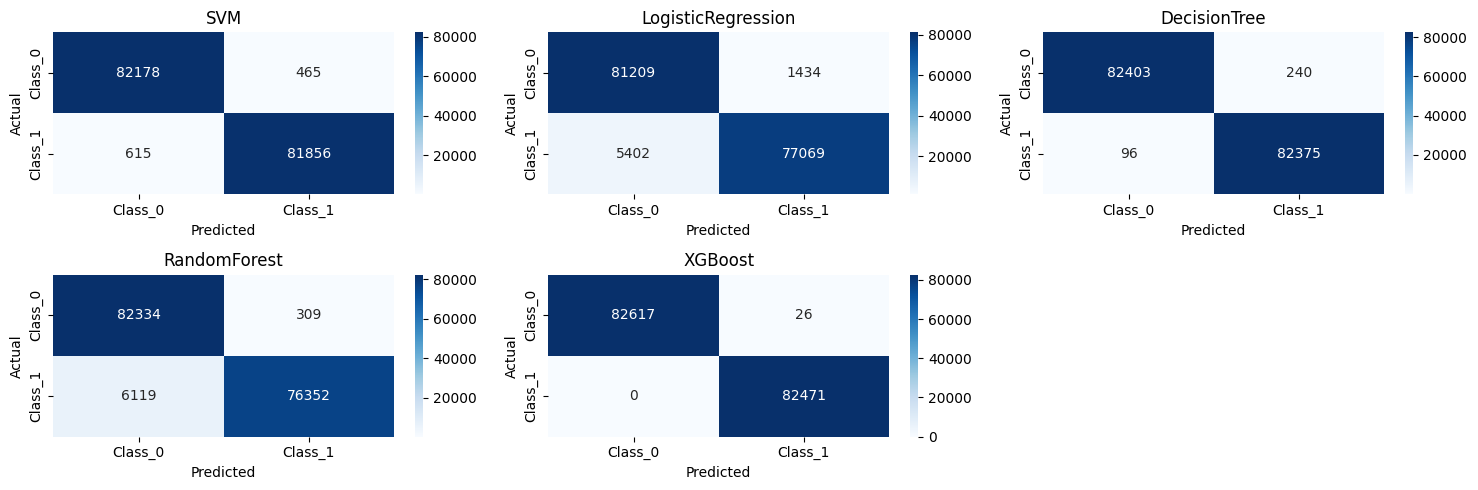

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
flat_axes = axes.flatten()

for ax in axes.flatten():
    ax.spines['top'].set_visible(False)

flat_axes[-1].axis('off')  

conf_matrices = result_table['conf_matrix']

for idx, model in enumerate(conf_matrices.index):
    confu_matrix = conf_matrices[model][0]
    plot_confusion_matrix(axes.flatten()[idx], confu_matrix, ["Class_0", "Class_1"], model)

plt.tight_layout()
plt.show()


In [59]:
result_table.iloc[:, :4]

,accuracy,precision,recall,f1_score
classifiers,,,,
SVM,0.993459,0.993461,0.993459,0.993459
LogisticRegression,0.958598,0.959658,0.958598,0.958573
DecisionTree,0.997965,0.997967,0.997965,0.997965
RandomForest,0.961069,0.963362,0.961069,0.961020
XGBoost,0.999843,0.999843,0.999843,0.999843


```Here, XGBoost Performs best.```